
# Project: Investigate a Dataset - [TMDb movie data ]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
The TMBd movie data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. The information are listed under 21 columns as follows: 

The ID and the IMDB ID column which helps identify each movie.
The POPULARITY column showing how popular a movie is.
The BUDGET column showing the budgeted money for each movie.
The REVENUE column showing the income made from each movie.
The ORIGINAL TITLE column showing the title of each movie.
The CAST column showing the names of actors in each movie.
The HOMEPAGE column showing the link to access each movie.
The director column showing the names of the movie directors.
The TAGLINE column showing the taglines from each movie.
The KEYWORD column showing the key words from each movie.
The OVERVIEW column showing an overview on each movie.
The RUNTIME column showing the time between the start to end time of each movie.
The GENRES column showing the categories of movies.
The PRODUCTION COMPANY column showing the companies that produced each movie.
The RELEASE DATE column showing the date of release for each movie.
The VOTE COUNT column showing the amount of votes for a particular movie.
The VOTE AVERAGE column showing the average number of votes for each movie.
The RELEASE YEAR column showing the year of release for each movie.
The BUDGET_ADJ column showing the budget associated movie in terms of 2010 dollars, accounting for inflation over time.
The REVENUE_ADJ column showing the revenue associated movie in terms of 2010 dollars, accounting for inflation over time.




### Question(s) for Analysis
1. WHAT GENRE HAS THE HIGHEST RELEASE OF MOVIES?
2. WHO IS THE MOST FEATURED ACTOR/ACTRESS AMONG THE CAST IN THE MOVIES?
3. WHAT IS THE AVERAGE REVENUE FROM MOVIES FROM YEAR TO YEAR?



In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling



In [2]:
# Loading the tmbd data 
df_movie = pd.read_csv('tmdb-movies.csv')

# Reading the first 20 rows of the tmdb data
df_movie.head(20)


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,...,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,...,"Growing up can be a bumpy road, and it's no ex...",94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15

In [3]:
### Reading the last 20 rows of the tmdb data
df_movie.tail(20)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10846,17102,tt0059127,0.212716,0,0,Dracula: Prince of Darkness,Christopher Lee|Barbara Shelley|Andrew Keir|Fr...,NaN,Terence Fisher,"DEAD for Ten Years DRACULA, Prince of Darkness...",...,"Whilst vacationing in the Carpathian Mountain,...",90,Horror,Seven Arts Productions|Hammer Film Productions,1/9/66,16,5.7,1966,0.000000e+00,0.000000e+00
10847,28763,tt0060548,0.034555,0,0,Island of Terror,Peter Cushing|Edward Judd|Carole Gray|Eddie By...,NaN,Terence Fisher,How could they stop the devouring death...that...,...,A small island community is overrun with creep...,89,Science Fiction|Horror,Planet Film Productions|Protelco,6/20/66,13,5.3,1966,0.000000e+00,0.000000e+00
10848,2161,tt0060397,0.207257,5115000,12000000,Fantastic Voyage,Stephen Boyd|Raquel Welch|Edmond O'Brien|Donal...,NaN,Richard Fleischer,A Fantastic and Spectacular Voyage... Through ...,...,The science of miniaturization has been unlock...,100,Adventure|Science Fiction,Twentieth Century Fox Film Corporation,8/24/66,42,6.7,1966,3.436265e+07,8.061618e+07
10849,28270,tt0060445,0.206537,0,0,Gambit,Michael Caine|Shirley MacLaine|Herbert Lom|Joh...,NaN,Ronald Neame,Shirley MacLaine raises Michael Caine!,...,Harry Dean (Michael Caine) has a perfect plan ...,109,Action|Comedy|Crime,Universal Pictures,12/16/66,14,6.1,1966,0.000000e+00,0.000000e+00
10850,26268,tt0060490,0.202473,0,0,Harper,Paul Newman|Lauren Bacall|Julie Harris|Arthur ...,NaN,Jack Smight,Harper takes a case - and the payoff is murder.,...,Harper is a cynical private eye in the best tr...,121,Action|Drama|Thriller|Crime|Mystery,Warner Bros.,2/23/66,14,6.0,1966,0.000000e+00,0.000000e+00
10851,15347,tt0060182,0.342791,0,0,Born Free,Virginia McKenna|Bill Travers|Geoffrey Keen|Pe...,NaN,James Hill,From The Pages Of The Beloved Best Seller... A...,...,Born Free (1966) is an Open Road Films Ltd./Co...,95,Adventure|Drama|Action|Family|Foreign,High Road,6/22/66,15,6.6,1966,0.000000e+00,0.000000e+00
10852,37301,tt0060165,0.227220,0,0,A Big Hand for the Little Lady,Henry Fonda|Joanne Woodward|Jason Robards|Paul...,NaN,Fielder Cook,All the action you can take...all the adventur...,...,A naive traveler in Laredo gets involved in a ...,95,Western,Eden Productions Inc.,5/31/66,11,6.0,1966,0.000000e+00,0.000000e+00
10853,15598,tt0060086,0.163592,0,0,Alfie,Michael Caine|Shelley Winters|Millicent Martin...,NaN,Lewis Gilbert,Is any man an Alfie? Ask any girl!,...,The film tells the story of a young man who le...,114,Comedy|Drama|Romance,NaN,3/29/66,26,6.2,1966,0.000000e+00,0.000000e+00
10854,31602,tt0060232,0.146402,0,0,The Chase,Marlon Brando|Jane Fonda|Robert Redford|E.G. M...,NaN,Arthur Penn,The chase is on!,...,Most everyone in town thinks that Sheriff Cald...,135,Thriller|Drama|Crime,Horizon Pictures|Columbia Pictures Corporation,2/17/66,17,6.0,1966,0.000000e+00,0.000000e+00
10855,13343,tt0059221,0.141026,700000,0,The Ghost & Mr. Chicken,Don Knotts|Joan Staley|Liam Redmond|Dick Sarge...,NaN,Alan Rafkin,G-G-GUARANTEED! YOU'LL BE SCARED UNTIL YOU LAU...,...,Luther Heggs aspires to being a reporter for h...,90,Comedy|Family|Mystery|Romance,Universal Pictures,1/20/66,14,6.1,1966,4.702610e+06,0.000000e+00


In [4]:
# the number of rows, columns in the tmdb data.
print(df_movie.shape)

(10866, 21)


In [5]:
# summary of the tmdb data
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [6]:
# sum of the missing values in each column.
df_movie.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [7]:
#checking the columns type of the tmdb data.
df_movie.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [8]:
# the number of unique values from columns in the tmdb data
df_movie.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [9]:
# summary of the dependent and independent variables in the tmdb data.
df_movie.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [10]:
# Number of duplicated rows
df_movie.duplicated().sum()

1

In [11]:
## checking the index of each column in the tmdb data
list(enumerate(df_movie))

[(0, 'id'),
 (1, 'imdb_id'),
 (2, 'popularity'),
 (3, 'budget'),
 (4, 'revenue'),
 (5, 'original_title'),
 (6, 'cast'),
 (7, 'homepage'),
 (8, 'director'),
 (9, 'tagline'),
 (10, 'keywords'),
 (11, 'overview'),
 (12, 'runtime'),
 (13, 'genres'),
 (14, 'production_companies'),
 (15, 'release_date'),
 (16, 'vote_count'),
 (17, 'vote_average'),
 (18, 'release_year'),
 (19, 'budget_adj'),
 (20, 'revenue_adj')]

In [3]:
# selecting the relevant columns to the questions for analysis.
tmdb_data = df_movie.iloc[:,[2,3,4,6,12,13,15,16,17,18,19,20]].copy()
tmdb_data 

,popularity,budget,revenue,cast,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Shailene Woodley|Theo James|Kate Winslet|Ansel...,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...
10861,0.080598,0,0,Michael Hynson|Robert August|Lord 'Tally Ho' B...,95,Documentary,6/15/66,11,7.4,1966,0.000000e+00,0.000000e+00
10862,0.065543,0,0,James Garner|Eva Marie Saint|Yves Montand|Tosh...,176,Action|Adventure|Drama,12/21/66,20,5.7,1966,0.000000e+00,0.000000e+00
10863,0.065141,0,0,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,94,Mystery|Comedy,1/1/66,11,6.5,1966,0.000000e+00,0.000000e+00
10864,0.064317,0,0,Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,80,Action|Comedy,11/2/66,22,5.4,1966,0.000000e+00,0.000000e+00


In [13]:
#viewing the relevant column info.
tmdb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   popularity    10866 non-null  float64
 1   budget        10866 non-null  int64  
 2   revenue       10866 non-null  int64  
 3   cast          10790 non-null  object 
 4   runtime       10866 non-null  int64  
 5   genres        10843 non-null  object 
 6   release_date  10866 non-null  object 
 7   vote_count    10866 non-null  int64  
 8   vote_average  10866 non-null  float64
 9   release_year  10866 non-null  int64  
 10  budget_adj    10866 non-null  float64
 11  revenue_adj   10866 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 1018.8+ KB


At this point we using 12 columns out of the original 21 columns for this analysis.

In [14]:
#total missing values in the relevant columns
tmdb_data.isnull().sum()

popularity       0
budget           0
revenue          0
cast            76
runtime          0
genres          23
release_date     0
vote_count       0
vote_average     0
release_year     0
budget_adj       0
revenue_adj      0
dtype: int64

In [15]:
tmdb_data.dtypes

popularity      float64
budget            int64
revenue           int64
cast             object
runtime           int64
genres           object
release_date     object
vote_count        int64
vote_average    float64
release_year      int64
budget_adj      float64
revenue_adj     float64
dtype: object

In [16]:
tmdb_data.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [17]:
tmdb_data.duplicated().sum()

1


### Data Cleaning


### DISCUSSING THE STRUCTURE OF THE DATA AND THE PROBLEMS
The TMDb data has 9 columns with missing values, focusing on the relevant columns for this analysis;

 1)The missing data in the cast and genre column are dropped.
 
 2)The datatype of the release date column needs to be converted to datetime.
 
 3)The budget,revenue,runtime,budget_adj and revenue_adj columns have zero values which shows no budget or income made from such movies. This requires removal of those rows to clean the data.


In [18]:
# coverting the datatype of release date from object to datetime.
tmdb_data['release_date'] = pd.to_datetime(tmdb_data['release_date'])

In [19]:
#checking the current datatype of the release date column.
tmdb_data.dtypes

popularity             float64
budget                   int64
revenue                  int64
cast                    object
runtime                  int64
genres                  object
release_date    datetime64[ns]
vote_count               int64
vote_average           float64
release_year             int64
budget_adj             float64
revenue_adj            float64
dtype: object

In [20]:
# creating a seperate list of columns having some zero values.
sep_list=['budget', 'revenue', 'runtime', 'budget_adj', 'revenue_adj']

# Replacing  all the values from '0' to NAN in the list
tmdb_data[sep_list] = tmdb_data[sep_list].replace(0, np.NAN)

# Removing all the row which has NaN value in sep_list 
tmdb_data.dropna(subset = sep_list, inplace = True)


In [21]:
tmdb_data.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3855.000000,3.855000e+03,3.855000e+03,3855.000000,3855.000000,3855.00000,3855.000000,3.855000e+03,3.855000e+03
mean,1.191400,3.720183e+07,1.076589e+08,109.215824,527.611933,6.16786,2001.263294,4.423630e+07,1.370294e+08
std,1.475002,4.220291e+07,1.765248e+08,19.922166,879.868374,0.79504,11.281989,4.480403e+07,2.160944e+08
min,0.001117,1.000000e+00,2.000000e+00,15.000000,10.000000,2.20000,1960.000000,9.693980e-01,2.370705e+00
25%,0.462448,1.000000e+07,1.357645e+07,95.000000,71.000000,5.70000,1995.000000,1.309053e+07,1.834123e+07
50%,0.797298,2.400000e+07,4.479322e+07,106.000000,204.000000,6.20000,2004.000000,3.001558e+07,6.171861e+07
75%,1.368245,5.000000e+07,1.241530e+08,119.000000,580.000000,6.70000,2010.000000,6.061307e+07,1.632401e+08
max,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.40000,2015.000000,4.250000e+08,2.827124e+09


In [22]:
# dropping the missing data in cast and genre column.
# creating a seperate list of columns having some missing values.
diff_list=['cast', 'genres']

# Removing all the row which has NaN value in diff_list 
tmdb_data.dropna(subset = diff_list, inplace = True)

In [23]:
#checking if theres anymore missing data.
tmdb_data.isnull().sum()

popularity      0
budget          0
revenue         0
cast            0
runtime         0
genres          0
release_date    0
vote_count      0
vote_average    0
release_year    0
budget_adj      0
revenue_adj     0
dtype: int64

In [24]:
# removing duplicates
tmdb_data.drop_duplicates(inplace=True)

#checking current number of duplicates.
tmdb_data.duplicated().sum()

0

In [25]:
tmdb_data.head()

,popularity,budget,revenue,cast,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000.0,1.513529e+09,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124.0,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000.0,3.784364e+08,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,120.0,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000.0,2.952382e+08,Shailene Woodley|Theo James|Kate Winslet|Ansel...,119.0,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000.0,2.068178e+09,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,136.0,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000.0,1.506249e+09,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,137.0,Action|Crime|Thriller,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


<a id='eda'></a>
## Exploratory Data Analysis





###  Q1. WHAT GENRE HAS THE HIGHEST RELEASE OF MOVIES?


In [4]:
#Removing the delimeter in the genre column.
def data(x):
    #concatenating all the rows in genre column
    conc_data = tmdb_data[x].str.cat(sep='|')
    data = pd.Series(conc_data.split('|'))
    concd_data = data.value_counts(ascending=False)
    
    return concd_data
    

In [11]:
# Number of movies released in each genre.
movie_releases = data('genres')
print(movie_releases)

Drama              4761
Comedy             3793
Thriller           2908
Action             2385
Romance            1712
Horror             1637
Adventure          1471
Crime              1355
Family             1231
Science Fiction    1230
Fantasy             916
Mystery             810
Animation           699
Documentary         520
Music               408
History             334
War                 270
Foreign             188
TV Movie            167
Western             165
dtype: int64


Drama genre has the highest release of movies.

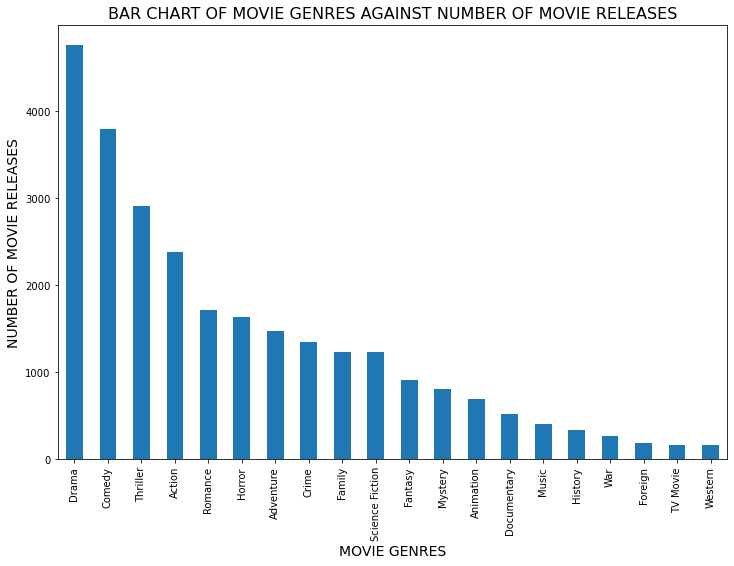

In [69]:
#Bar chart showing the number of movie released based on genre.
movie_releases.plot(kind='bar',figsize=(12,8))
#on x axis
plt.xlabel('MOVIE GENRES', fontsize = 14)
#on y-axis
plt.ylabel('NUMBER OF MOVIE RELEASES', fontsize = 14)
plt.title('BAR CHART OF MOVIE GENRES AGAINST NUMBER OF MOVIE RELEASES', fontsize = 16);


### Q2. WHO IS THE MOST FEATURED ACTOR/ACTRESS AMONG THE CAST IN THE MOVIES?

In [76]:
# The number of movies a particular actor/actress features as a cast.
movie_cast = data('cast')[:10]
print(movie_cast)

Robert De Niro       72
Samuel L. Jackson    71
Bruce Willis         62
Nicolas Cage         61
Michael Caine        53
Robin Williams       51
John Cusack          50
John Goodman         49
Morgan Freeman       49
Liam Neeson          48
dtype: int64


Robert De Niro is the most featured actor among the cast in the various movies.

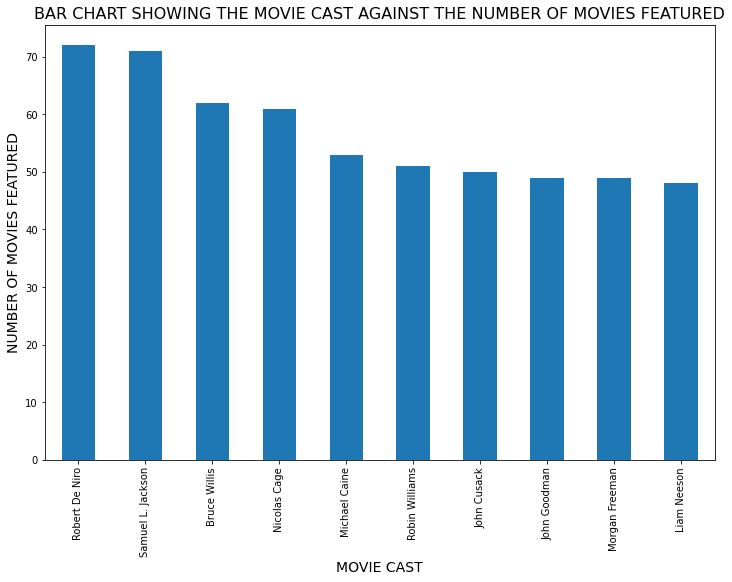

In [80]:
#filtering the first ten popular cast and plotting on a bar chart to view the number of movies they acted.
movie_cast.iloc[:10].plot(kind='bar', figsize=(12,8))
plt.title('BAR CHART SHOWING THE MOVIE CAST AGAINST THE NUMBER OF MOVIES FEATURED', fontsize= 16)  
#on x axis
plt.xlabel('MOVIE CAST', fontsize = 14);
#on y-axis
plt.ylabel('NUMBER OF MOVIES FEATURED', fontsize = 14);


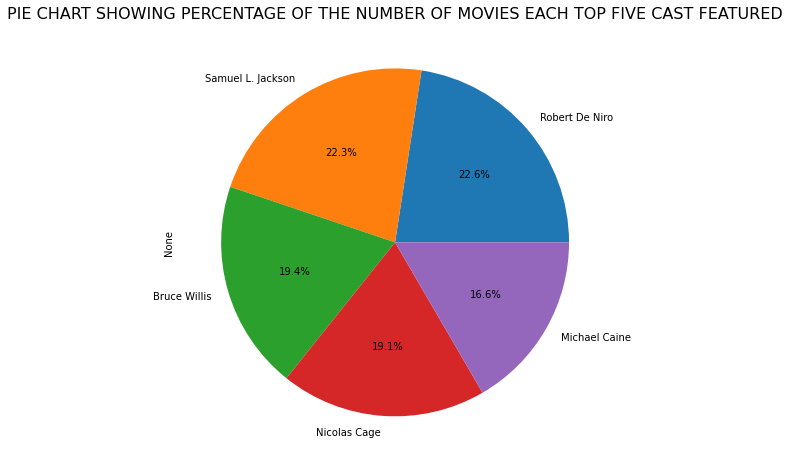

In [74]:
#Evaluating the percentage of movies released according to the top 5 cast.
top_cast = data('cast')[:5]
plt.title('PIE CHART SHOWING PERCENTAGE OF THE NUMBER OF MOVIES EACH TOP FIVE CAST FEATURED', fontsize= 16)
top_cast.plot(kind='pie',figsize=(12,8),autopct='%1.1f%%');


### Q2. WHAT IS THE AVERAGE REVENUE FROM MOVIES FROM YEAR TO YEAR?


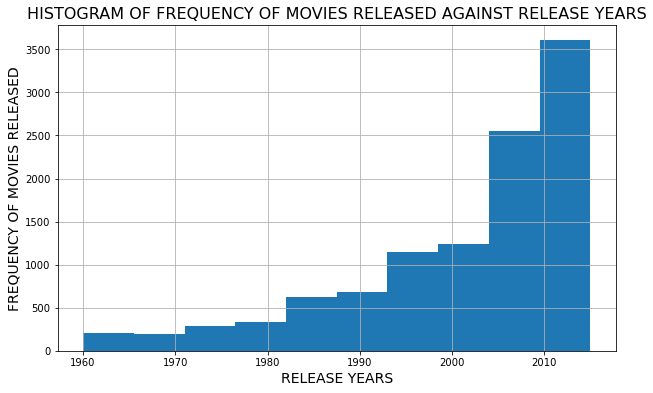

In [81]:
#viewing the frequency of the release years using histogram
tmdb_data['release_year'].hist(figsize=(10,6));
plt.title('HISTOGRAM OF RELEASE YEARS AGAINST FREQUENCY OF MOVIES RELEASED', fontsize= 16)
#on x axis
plt.xlabel('RELEASE YEARS', fontsize = 14);
#on y-axis
plt.ylabel('FREQUENCY OF MOVIES RELEASED', fontsize = 14);


In [13]:
Avg_revenue = tmdb_data.groupby('release_year')['revenue'].mean()
print(Avg_revenue)

release_year
1960    4.531406e+06
1961    1.089420e+07
1962    6.736870e+06
1963    5.511911e+06
1964    8.118614e+06
1965    1.308805e+07
1966    1.842102e+06
1967    1.844587e+07
1968    6.788025e+06
1969    7.869583e+06
1970    1.366395e+07
1971    7.362011e+06
1972    1.236825e+07
1973    2.225420e+07
1974    1.728808e+07
1975    2.176114e+07
1976    1.704267e+07
1977    3.825584e+07
1978    2.107353e+07
1979    2.955781e+07
1980    2.267516e+07
1981    2.164154e+07
1982    3.035116e+07
1983    2.884412e+07
1984    2.510023e+07
1985    2.638323e+07
1986    2.481635e+07
1987    2.769684e+07
1988    2.579001e+07
1989    3.770017e+07
1990    4.026641e+07
1991    3.538797e+07
1992    4.570040e+07
1993    3.907388e+07
1994    3.856212e+07
1995    5.232195e+07
1996    4.074261e+07
1997    5.549569e+07
1998    4.520559e+07
1999    5.069515e+07
2000    4.836432e+07
2001    5.541357e+07
2002    5.505120e+07
2003    5.387275e+07
2004    5.470301e+07
2005    4.537592e+07
2006    3.989152e+07


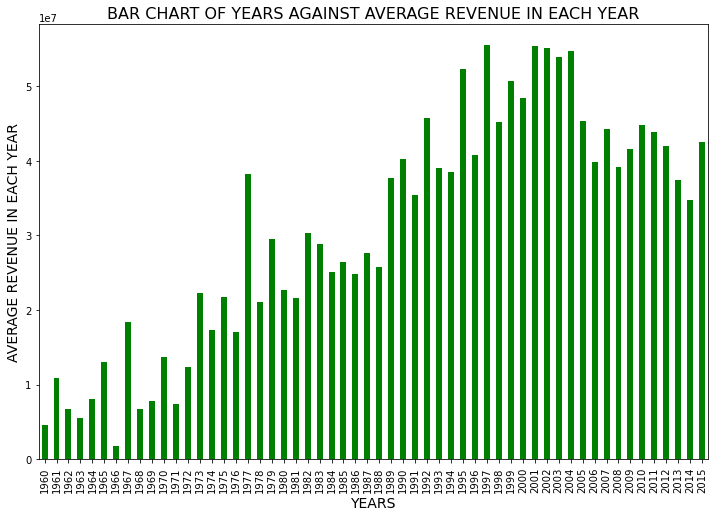

In [84]:
Avg_revenue.plot(kind='bar', figsize=(12,8), color='green')
#on x axis
plt.xlabel('YEARS', fontsize = 14)
#on y-axis
plt.ylabel('AVERAGE REVENUE IN EACH YEAR', fontsize = 14);
plt.title('BAR CHART OF YEARS AGAINST AVERAGE REVENUE IN EACH YEAR',fontsize= 16);

Theres been an increase in the average revenue from 1989 till 2015 as seen on the bar chart.

<a id='conclusions'></a>
## Conclusions




It can be concluded that 4,721 movies out of 10,866 movies in the dataset are categorized under drama genre closely followed by comedy with 3,793 movies.From question two, Robert De Niro had the highest features in 72 movies closely followed by Samuel L. Jackson which featured in 71 movies.while in question 3 ,it can be concluded that from the year 1960 to 2015 there has been an improvement in the average revenue from the movies.

one of the limitation here was the null values in the genre and cast column which had to be dropped which would have affected the analysis in giving a 100% result on the genre and cast with highest release.



## Communication
communicating the various data visuals;
from the barchart of movie genres against number of releases, the bars are decreasing in size from drama genre to western genre which has the highest and lowest number of release of movies respectively. The bar chart also shows genres with number of releases that are close such as family and science fiction and the Tv movie and western. 

since the number of cast is so large, filtering the top ten cast and the movies they featured with Robert De Niro having the highest number of 72 movies while Liam Neeson with the least number of 48 movies. The bar chart also shows closely number of movies featured by some of the cast such as John Goodma,Morgan Freeman and Liam Neeson. The pie chart shows the top five cast and the number of movie releases in percentage.

The histogram of frequency of movies released against released years is skewed to the left showing that the years with maximum number of release are toward the right and there are more years toward the left with less number of movie release.From the bar chart of years against the average revenue in each year,it shows more revenue was made around 1989 to the 2000's
 


In [85]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1